/tmp/ipykernel_12365/1981783540.py:13: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  config_file = pkg_resources.resource_filename('ev2gym', config_file)


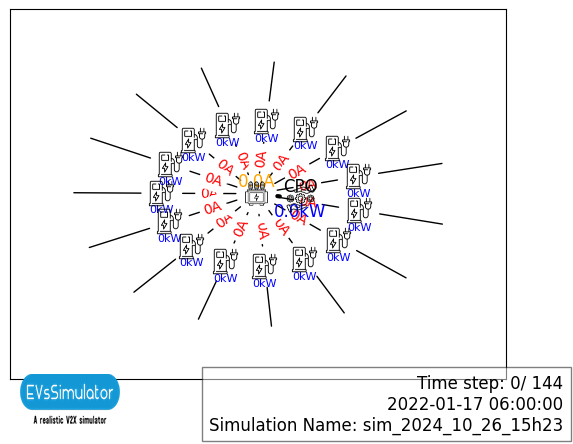

In [4]:
import gymnasium as gym
from stable_baselines3 import PPO, A2C, DDPG, SAC, TD3
import pkg_resources


from ev2gym.models.ev2gym_env import EV2Gym
# Choose a default reward function and state function or create your own!!!
from ev2gym.rl_agent.reward import profit_maximization, SquaredTrackingErrorReward, ProfitMax_TrPenalty_UserIncentives
from ev2gym.rl_agent.state import V2G_profit_max, PublicPST, V2G_profit_max_loads

# we will use an example configuration file
config_file = "/example_config_files/testPST.yaml"
config_file = pkg_resources.resource_filename('ev2gym', config_file)

# Creating the environment
env = EV2Gym(config_file,
             render_mode=True,
             seed=42,
             save_plots=False,
             save_replay=False)

In [ ]:
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback
import numpy as np
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """

    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, "best_model")
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

            # Retrieve training reward
            x, y = ts2xy(load_results(self.log_dir), "timesteps")
            if len(x) > 0:
                # Mean training reward over the last 100 episodes
                mean_reward = np.mean(y[-100:])
                if self.verbose > 0:
                    print(f"Num timesteps: {self.num_timesteps}")
                    print(
                        f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward per episode: {mean_reward:.2f}"
                    )

                # New best model, you could save the agent here
                if mean_reward > self.best_mean_reward:
                    self.best_mean_reward = mean_reward
                    # Example for saving best model
                    if self.verbose > 0:
                        print(f"Saving new best model to {self.save_path}.zip")
                    self.model.save(self.save_path)

        return True

In [3]:
import os
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

env2 = env
env = Monitor(env, log_dir)

# Initialize the RL agent
model = DDPG("MlpPolicy", env)
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)
model.learn(total_timesteps=30_000,callback=callback)

NameError: name 'env' is not defined

In [1]:
obs = env2.reset()

stats = []
for i in range(96*1000):

    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)

    # env.render()
    # VecEnv resets automatically
    if done:
        stats.append(info)
        obs = env.reset()

NameError: name 'env2' is not defined

In [9]:
# print average stats
print("=====================================================")
print("total_ev_served: ", sum(
    [i[0]['total_ev_served'] for i in stats])/len(stats))
print("total_profits: ", sum(
    [i[0]['total_profits'] for i in stats])/len(stats))
print("total_energy_charged: ", sum(
    [i[0]['total_energy_charged'] for i in stats])/len(stats))
print("total_energy_discharged: ", sum(
    [i[0]['total_energy_discharged'] for i in stats])/len(stats))
print("average_user_satisfaction: ", sum(
    [i[0]['average_user_satisfaction'] for i in stats])/len(stats))
print("power_tracker_violation: ", sum(
    [i[0]['power_tracker_violation'] for i in stats])/len(stats))
print("tracking_error: ", sum(
    [i[0]['tracking_error'] for i in stats])/len(stats))
print("energy_user_satisfaction: ", sum(
    [i[0]['energy_user_satisfaction'] for i in stats])/len(stats))
print("total_transformer_overload: ", sum(
    [i[0]['total_transformer_overload'] for i in stats])/len(stats))
print("reward: ", sum([i[0]['episode']['r'] for i in stats])/len(stats))

total_ev_served:  2.7265625
total_profits:  -7.143534153963001
total_energy_charged:  34.0464568977218
total_energy_discharged:  0.0
average_user_satisfaction:  0.9650472395833326
power_tracker_violation:  45.51301873915913
tracking_error:  664.4970556390476
energy_user_satisfaction:  100.0
total_transformer_overload:  0.0
reward:  -449.01779717447914
